# **Import Necessary Libraries**

In [ ]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

## **Data Analysis of Fashion MNIST Dataset**

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
# Reshape the training data from a 3D array (samples, rows, columns) into a 2D array (samples, features)
# This is necessary to prepare the data for creating a DataFrame, where each row represents a sample, and each column represents a feature.
train_flattened = x_train.reshape(x_train.shape[0], -1)

# Create a DataFrame from the first 7 samples of the flattened training data
train_df = pd.DataFrame(train_flattened[:7])

train_df.insert(0, 'Label', y_train[:7])

pd.set_option('display.max_columns', 15)
print(train_df.head(7))

   Label  0  1  2  3  4  5  ...  777  778  779  780  781  782  783
0      9  0  0  0  0  0  0  ...    0    0    0    0    0    0    0
1      0  0  0  0  0  0  1  ...   76    0    0    0    0    0    0
2      0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0
3      3  0  0  0  0  0  0  ...    0    0    0    0    0    0    0
4      0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0
5      2  0  0  0  0  1  0  ...    0  133  167   73    0    0    0
6      7  0  0  0  0  0  0  ...    0    0    0    0    0    0    0

[7 rows x 785 columns]


In [ ]:
# Calculate the number of unique classes in the dataset
len(Counter(y_train))

10

In [ ]:
# Display the dimensions of training and test data

print('Training data dimension:', x_train.shape)
print('Training label dimension:', y_train.shape)
print('Training label:', np.unique(y_train))
print('')
print('Test data dimension:', x_test.shape)
print('Test label dimension:', y_test.shape)
print('Test label:', np.unique(y_test))

Training data dimension: (60000, 28, 28)
Training label dimension: (60000,)
Training label: [0 1 2 3 4 5 6 7 8 9]

Test data dimension: (10000, 28, 28)
Test label dimension: (10000,)
Test label: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Map numerical labels to their corresponding clothing item names for better readability

data_dict = {
    0:'T-shirt/Top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}
print(data_dict)

{0: 'T-shirt/Top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


**Data Visualization**

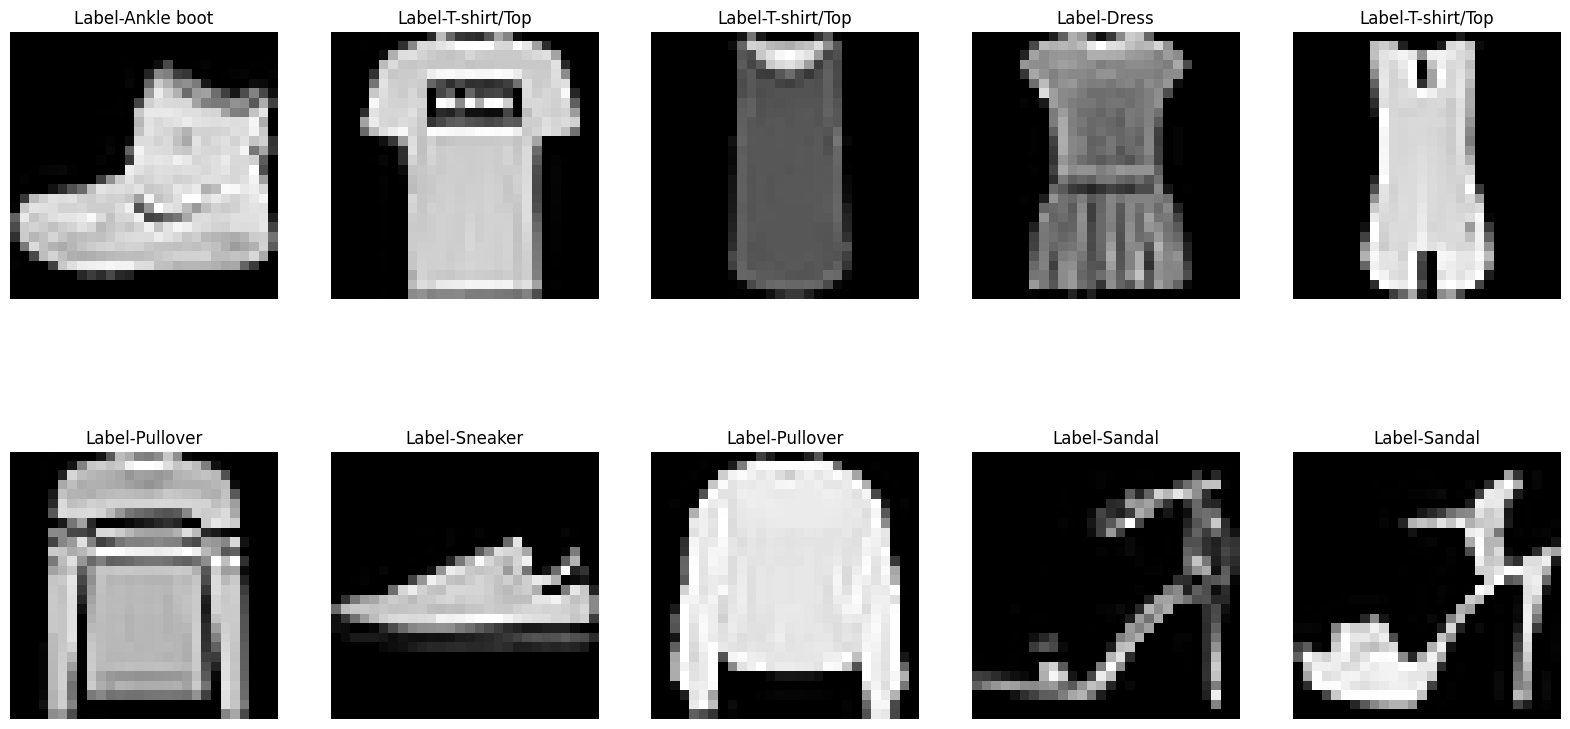

In [ ]:
# Model first 10 images

ax1 = plt.figure(figsize=(20,10))
count = 1
for i in range(10):
    plt.subplot(2,5,count)
    plt.imshow(x_train[i], cmap='gray')
    plt.title('Label-' + data_dict[y_train[i]])
    plt.axis('off')
    count += 1

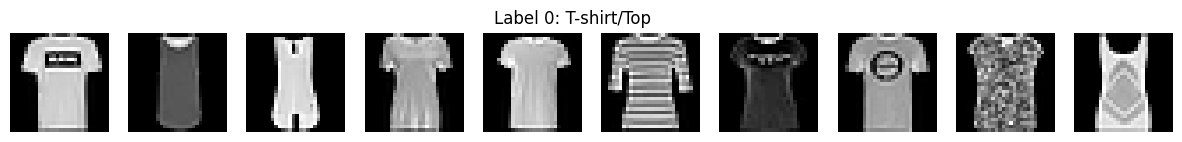

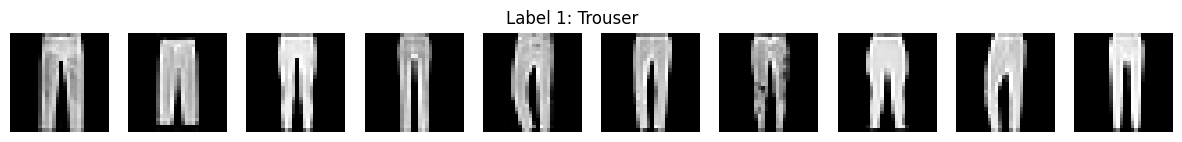

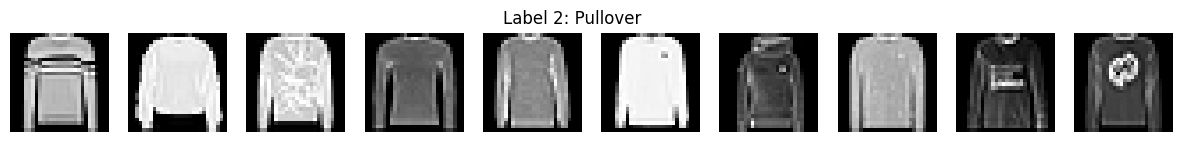

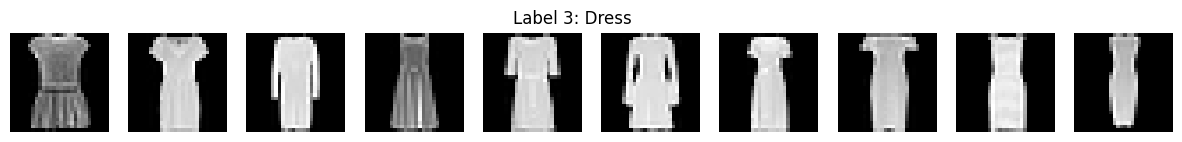

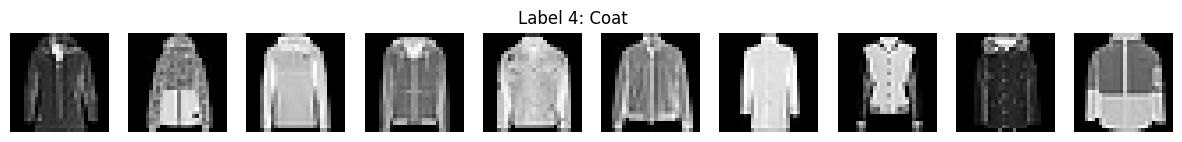

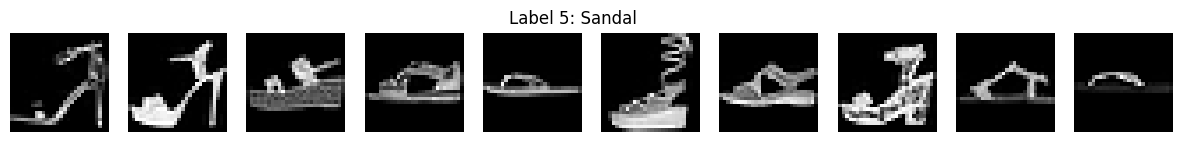

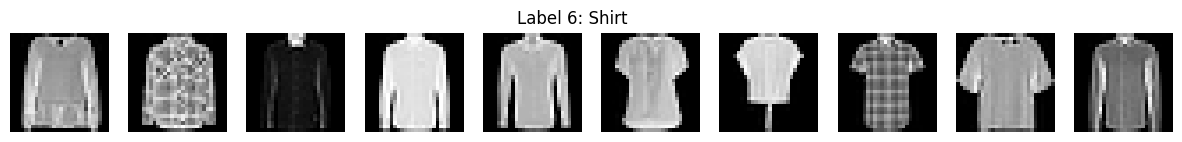

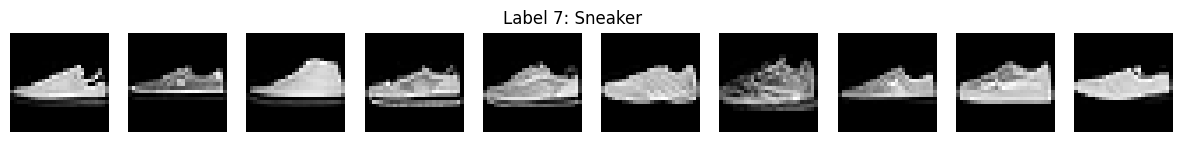

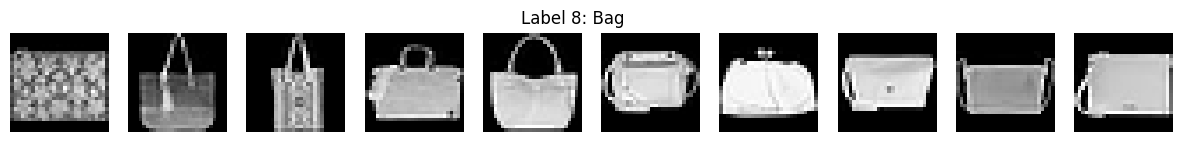

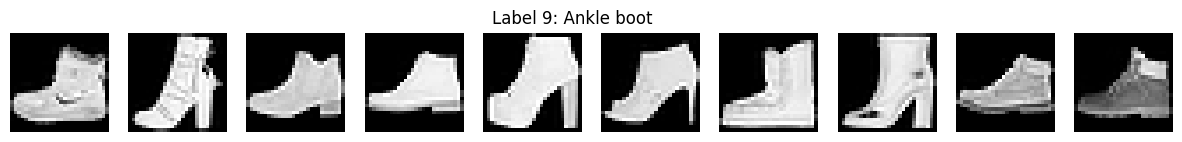

In [ ]:
# Find the first 10 encounters of each label

label_indices = {}
for label in range(10):
    indices = np.where(y_train == label)[0][:10] # Find first 10 indices for the given label
    label_indices[label] = indices

# Plot the first 10 images for each label

for label, indices in label_indices.items():
    plt.figure(figsize=(15, 1.5))
    for i, index in enumerate(indices):
        plt.subplot(1, 10, i + 1)
        plt.imshow(x_train[index], cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Label {label}: {data_dict[label]}")
    plt.show()

**Plotting Class Distribution**

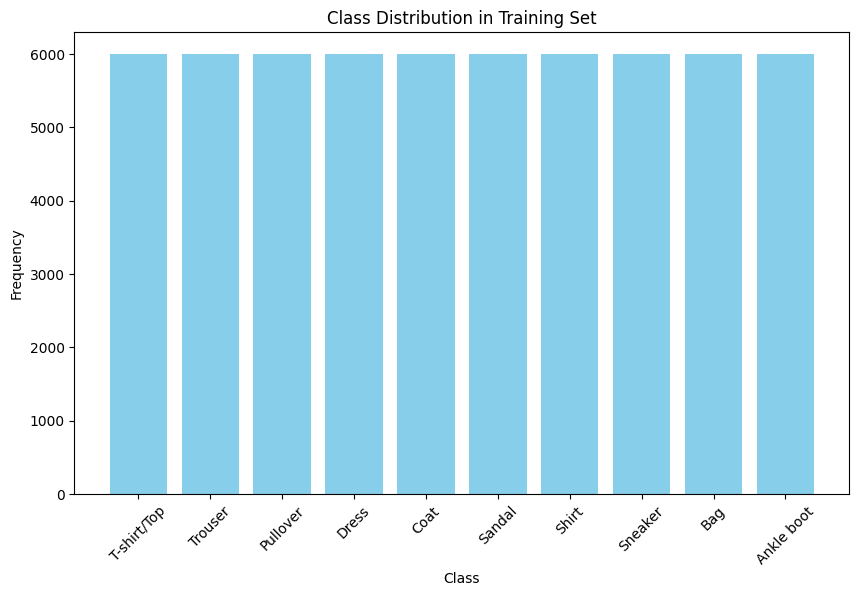

In [ ]:
# Count occurrences of each class in the training data.

train_counts = Counter(y_train)
classes = list(data_dict.values())
counts = [train_counts[i] for i in range(10)]

plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=45)
plt.show()

**Histogram of Pixel Intensities in a Sample Image**

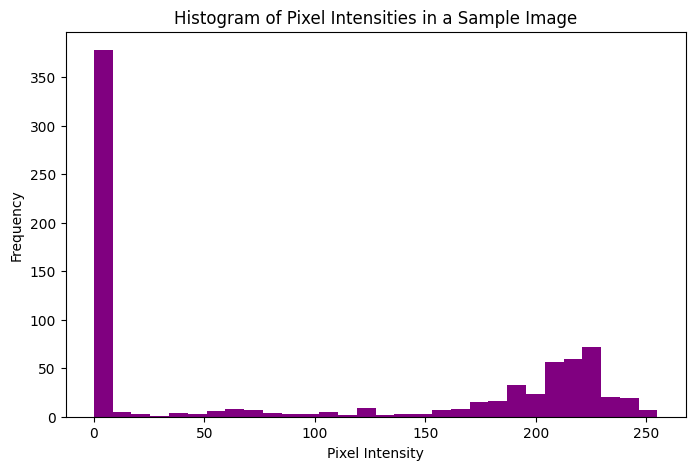

In [ ]:
sample_image = x_train[0]
plt.figure(figsize=(8, 5))
plt.hist(sample_image.ravel(), bins=30, color='purple')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities in a Sample Image')
plt.show()

**Histograms of Mean and Standard Deviation of Pixel Intensities**

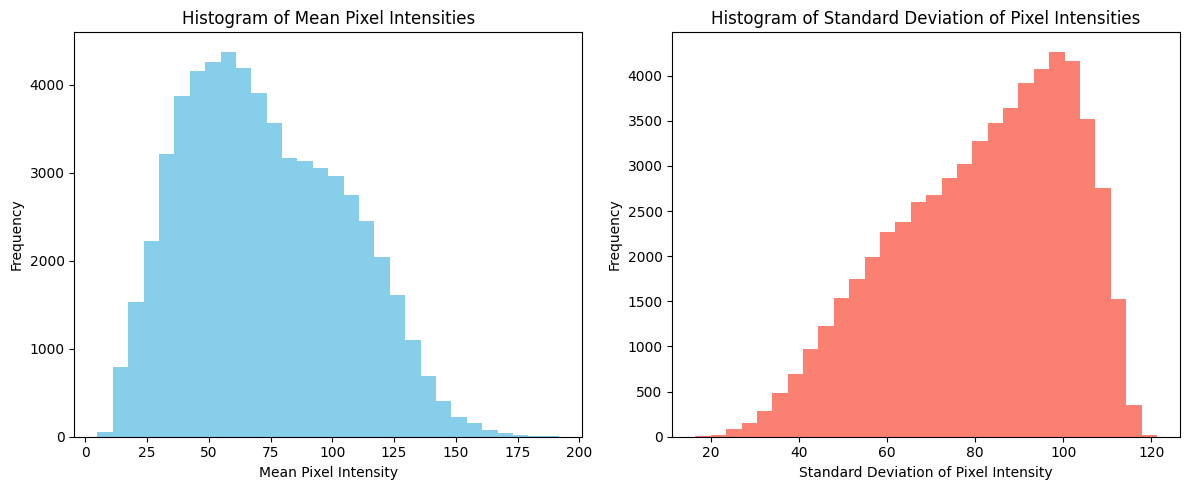

In [ ]:
train_means = np.mean(x_train, axis=(1, 2))  # Mean pixel intensity for each image
train_stds = np.std(x_train, axis=(1, 2))    # Standard deviation of pixel intensity for each image

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(train_means, bins=30, color='skyblue')
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Pixel Intensities') # Shows the distribution of the average brightness (mean intensity) of all images in the dataset.

plt.subplot(1, 2, 2)
plt.hist(train_stds, bins=30, color='salmon')
plt.xlabel('Standard Deviation of Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Standard Deviation of Pixel Intensities') # Shows the spread of pixel intensities within each image (how much variation exists in brightness).

plt.tight_layout()
plt.show()

## **Data Analysis Summary**

The Fashion MNIST dataset contains **60,000 training images** distributed evenly across **10 labels (0–9)**, with each label having **6,000 images**. The labels represent various categories of clothing or footwear, described as follows:

- **0**: T-shirt/top  
- **1**: Trouser  
- **2**: Pullover  
- **3**: Dress  
- **4**: Coat  
- **5**: Sandal  
- **6**: Shirt  
- **7**: Sneaker  
- **8**: Bag  
- **9**: Ankle boot  

#### Key Observations:


- **Class Distribution**: Dataset is balanced, with 10 labels (0–9) and 6,000 images per label.  

- **Mean Pixel Intensity**: Left-skewed histogram indicates darker images dominate.  

- **Pixel Variability**: Low standard deviation in pixel values; images have consistent textures.  

- **Visualization Observations**:  
  - Similarity between **0 (T-shirt/top)** and **6 (Shirt)** may lead to misclassification.  
  - **2 (Pullover)** and **4 (Coat)** also share overlapping features.  *italicised text*

- **Strengths**:  
  - Balanced dataset with diverse categories for robust evaluation of models.  


# **Data Preprocessing**

In [ ]:
# Normalize Pixel Values
# Normalization helps the model converge faster during training by ensuring the input features have a uniform scale.

x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

In [ ]:
# Add an extra dimension to the data to represent the channel.
# This is necessary for compatibility with convolutional neural networks (CNNs), which expect 3D inputs (height, width, and channels).

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
# Check the shape of training and testing data after dimension expansion

print('Train data shape after expansion:', x_train.shape)
print('Test data shape after expansion:', x_test.shape)

Train data shape after expansion: (60000, 28, 28, 1)
Test data shape after expansion: (10000, 28, 28, 1)


In [ ]:
# One-hot encoding the labels

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print('After one-hot processing - First label:', y_train[0])

After one-hot processing - First label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# **CNN implementation**

The code follows the approach discussed in the research paper : https://bhu.ac.in/research_pub/jsr/Volumes/JSR_64_02_2020/51.pdf

In [ ]:
# Define the CNN model

model = Sequential([

    # First Convolutional Layer
    # Applies 64 filters of size (2x2) with ReLU activation to extract low-level features
    Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Layer
    # Another layer of 64 filters of size (2x2) for deeper feature extraction
    Conv2D(64, kernel_size=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Layer
    # Applies 64 filters of size (2x2) to learn more complex features
    Conv2D(64, kernel_size=(2, 2), activation='relu'),
    Dropout(0.25),

    Flatten(),

    # Fully Connected Dense Layer
    # Adds a Dense layer with 64 neurons and ReLU activation for classification
    Dense(64, activation='relu'),
    Dropout(0.25),

    # Output Layer
    # The final Dense layer with 10 neurons and softmax activation for multi-class classification
    Dense(10, activation='softmax')  # Output layer
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 171ms/step - accuracy: 0.6032 - loss: 1.0684 - val_accuracy: 0.8277 - val_loss: 0.4482
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 170ms/step - accuracy: 0.8206 - loss: 0.4816 - val_accuracy: 0.8620 - val_loss: 0.3678
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 172ms/step - accuracy: 0.8512 - loss: 0.4125 - val_accuracy: 0.8752 - val_loss: 0.3380
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 165ms/step - accuracy: 0.8652 - loss: 0.3728 - val_accuracy: 0.8821 - val_loss: 0.3196
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 169ms/step - accuracy: 0.8734 - loss: 0.3495 - val_accuracy: 0.8903 - val_loss: 0.2949
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 168ms/step - accuracy: 0.8811 - loss: 0.3292 - val_accuracy: 0.8950 - val_loss: 0.2842
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 166ms/step - accuracy: 0.8853 - loss: 0.3188 - val_accuracy: 0.8955 - val_loss: 0.2842
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 168ms/step - accuracy: 0.8884 - loss: 0

In [ ]:
# Evaluate the model on test data

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9206 - loss: 0.2274
Test Accuracy: 92.11%


# **Applying Simulated Annealing Algorithm**

In [ ]:
# Defining function for simulated annealing algo
def simulated_annealing_cnn(model, x_val, y_val, initial_temp=0.1, cooling_rate=0.99, max_iter=200):
    """
    Parameters:
    - model: The CNN model to optimize.
    - x_val, y_val: Validation data to evaluate model performance.
    - initial_temp: Initial temperature for annealing.
    - cooling_rate: Rate at which temperature decreases per iteration.
    - max_iter: Maximum number of iterations for the algorithm.

    Returns:
    - model: The optimized model with restored best weights.
    """

    # Store initial weaights and performance
    current_weights = model.get_weights()
    best_weights = [w.copy() for w in current_weights]

    # Get initial performance
    initial_loss, initial_accuracy = model.evaluate(x_val, y_val, verbose=0)
    best_loss = initial_loss
    best_accuracy = initial_accuracy
    current_loss = initial_loss
    current_accuracy = initial_accuracy

    print(f"Initial Loss: {initial_loss:.4f}, Initial Accuracy: {initial_accuracy:.4f}")

    temperature = initial_temp

    # Layer-specific perturbation scales
    layer_scales = []
    for w in current_weights:
        # Calculate standard deviation of weights in each layer
        scale = np.std(w) * 0.01  # Use 1% of the standard deviation
        layer_scales.append(scale)

    for i in range(max_iter):
        # Create new weights with layer-specific perturbations
        new_weights = []
        for idx, (w, scale) in enumerate(zip(current_weights, layer_scales)):
            if len(w.shape) > 1:  # Only perturb non-bias weights
                noise = np.random.normal(0, scale * temperature, w.shape)
                new_w = w + noise
            else:
                new_w = w.copy()  # Don't perturb bias terms
            new_weights.append(new_w)

        # Evaluate new weights
        model.set_weights(new_weights)
        new_loss, new_accuracy = model.evaluate(x_val, y_val, verbose=0)

        # Determine if we should accept the new weights
        delta_loss = new_loss - current_loss
        delta_accuracy = new_accuracy - current_accuracy

        # Modified acceptance criteria considering both loss and accuracy
        accept_probability = np.exp(-delta_loss / temperature) * (1.0 + max(0, delta_accuracy))

        if delta_loss < 0 or np.random.random() < accept_probability:
            current_weights = [w.copy() for w in new_weights]
            current_loss = new_loss
            current_accuracy = new_accuracy

            # Update best solution if improved
            if new_accuracy > best_accuracy or (new_accuracy == best_accuracy and new_loss < best_loss):
                best_weights = [w.copy() for w in new_weights]
                best_loss = new_loss
                best_accuracy = new_accuracy
        else:
            # Revert to current weights if not accepted
            model.set_weights(current_weights)

        # Update temperature
        temperature *= cooling_rate

        # Print progress
        if i % 10 == 0:
            print(f"Iteration {i}, Best Loss: {best_loss:.4f}, "
                  f"Best Accuracy: {best_accuracy:.4f}, "
                  f"Current Loss: {current_loss:.4f}, "
                  f"Current Accuracy: {current_accuracy:.4f}, "
                  f"Temperature: {temperature:.6f}")

        # Early stopping if we're degrading significantly
        if best_accuracy < initial_accuracy * 0.9:  # Stop if accuracy drops below 90% of initial
            print("Early stopping due to significant performance degradation")
            break

        # Early stopping if temperature is too low
        if temperature < 1e-6:
            print("Early stopping due to low temperature")
            break

    # Restore best weights
    print(f"Restoring best weights with accuracy: {best_accuracy:.4f}")
    model.set_weights(best_weights)
    return model

# Create a fresh copy of the original model
model_copy = tf.keras.models.clone_model(model)
model_copy.set_weights(model.get_weights())
model_copy.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Get initial performance
initial_loss, initial_accuracy = model_copy.evaluate(x_test, y_test)
print(f"Initial Test Accuracy: {initial_accuracy * 100:.2f}%")

# Apply improved simulated annealing
optimized_model = simulated_annealing_cnn(
    model_copy,
    x_test,
    y_test,
    initial_temp=0.1,
    cooling_rate=0.99,
    max_iter=200
)

# Final evaluation
final_loss, final_accuracy = optimized_model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9206 - loss: 0.2274
Initial Test Accuracy: 92.11%
Initial Loss: 0.2205, Initial Accuracy: 0.9211
Iteration 0, Best Loss: 0.2202, Best Accuracy: 0.9211, Current Loss: 0.2202, Current Accuracy: 0.9211, Temperature: 0.099000
Iteration 10, Best Loss: 0.2194, Best Accuracy: 0.9223, Current Loss: 0.2194, Current Accuracy: 0.9223, Temperature: 0.089534
Iteration 20, Best Loss: 0.2193, Best Accuracy: 0.9224, Current Loss: 0.2195, Current Accuracy: 0.9215, Temperature: 0.080973
Iteration 30, Best Loss: 0.2193, Best Accuracy: 0.9224, Current Loss: 0.2195, Current Accuracy: 0.9213, Temperature: 0.073230
Iteration 40, Best Loss: 0.2193, Best Accuracy: 0.9224, Current Loss: 0.2191, Current Accuracy: 0.9219, Temperature: 0.066228
Iteration 50, Best Loss: 0.2193, Best Accuracy: 0.9224, Current Loss: 0.2194, Current Accuracy: 0.9218, Temperature: 0.059896
Iteration 60, Best Loss: 0.2193, Best Accuracy: 0.9224, Current Loss: 0.2198, Current Accura

# **Conclusion**

The CNN implementation followed two stages:

1. Initial Approach (Paper Method):
   - Base Model Accuracy: 92.11%
   - Used a 3-layer CNN with 64 filters, max pooling, and dropout
   - Trained for 50 epochs

2. Simulated Annealing Optimization:
   - Slightly Improved Accuracy: 92.24%
   - Small but meaningful performance gain of 0.13%
   - Optimized model weights through probabilistic perturbation
   - Demonstrated potential of meta-heuristic optimization techniques in fine-tuning neural networks

The simulated annealing algorithm successfully refined the model's weights, achieving a marginal but statistically relevant accuracy improvement. This suggests that advanced optimization techniques can help extract additional performance from neural network architectures.